# Citibike Trips Distance Analysis for Men and Women

In [606]:
__author__ = 'Ruben Hambardzumyan, rh2684'

## Table of Contents

1. [Setup](## 1. Setup)
2. [The Idea and Initial Null Hypothesis](## 2. The Idea and Initial Null Hypothesis)
3. [Comments on Gerardo's Review, and The Final Null Nypothesis](## 3. Comments on Gerardo's Review, and The Final Null Nypothesis)
4. [Choosing The Statistical Test](## 4. Choosing The Statistical Test)
5. [Importing the Data](## 5. Importing the Data)
6. [Data Munging](## 6. Data Munging)
7. [Statistical Test](## 7. Statistical Test)
8. [Results](## 8. Results)


## 1. Setup

In [607]:
# Importing the libraries.

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import math
import scipy.stats as st

%pylab inline

# Checking the $PUIDATA environmental variable

if not os.environ.get('PUIDATA'):
    print('The $PUIDATA environmental variable does not exist!')

# Setting the significance level

alpha = 0.05

# Setting the random seed

np.random.seed(1452)

Populating the interactive namespace from numpy and matplotlib


## 2. The Idea and Initial Null Hypothesis

### Idea: Men are more likely to cycle long distances than women

<b>Initial Null Hypothesis:</b> <i>The ratio of women continuously cycling more than 30 minutes over the women that cycle less than 30 minutes is the same or lower than the ratio of men continuously cycling more than 30 minutes over the men cycling less than 30 minutes.</i>

$$
    H_1: \frac{M(T>30)}{M(T<30)}>\frac{W(T>30)}{W(T<30)}
$$

$$
    H_0: \frac{W(T>30)}{W(T<30)}<=\frac{M(T>30)}{M(T<30)}
$$

<b>Or</b>:

$$
    H_1: \frac{M(T>30)}{M(T<30)}-\frac{W(T>30)}{W(T<30)}>0
$$

$$
    H_0: \frac{W(T>30)}{W(T<30)}-\frac{M(T>30)}{M(T<30)}<=0
$$


## 3. Comments on Gerardo's Review, and The Final Null Nypothesis

Originally, the idea behind the Initial Null Hypothesis was testing the premise that men, considered having stronger physics and endurance by nature, travel longer distances then women. For the Citibike subscribers, I was wondering whether or not the fact that users constantly cycle (thus, maintain the fitness of their body) supports the premise, and if it does - to which extent. 

Gerardo noticed that right in this paragraph:

<p style="background-color:Gainsboro;
          text-align:justify; 
          padding:10px;
          font-family:monospace;">
Variations on the question: The analysis addressed was really: Are men more likely than women to spend more than 30 min on a bike. Which I guess could be motivated by the question: Do men spend more time biking than women do? I think the original idea is valid one and could be used by Citibike to address certain gender gap between users: Why is the citibike user more likely to be a man than a women? Why do women travel shorter distances? Why do men bike faster than women do? Is it related to physical aspects of the bike like weight and size? Is it because women are more cautious than men?</p>

Furthermore, I agree with him on this:

<p style="background-color:Gainsboro;
          text-align:justify; 
          padding:10px;
          font-family:monospace;">
However the null hypthesis talks about time and not distance as if the speed of both was the same. Having worked on speed as a variable, I know this is no so.</p>

That being said, I don't agree with the Null Hypothesis he proposes:

<p style="background-color:Gainsboro;
          text-align:justify; 
          padding:10px;
          font-family:monospace;">
Ho = The average distance cycled per trip by women is the same or less than that of men.</p>

As it misses the **range of trips**. Average of how many trips? Thus, I believe a better Final Null Hypothesis to address my question will be:

** Final Null Hypothesis: The average trip distance cycled by women in the month of October, 2016 is the same or less than that of men.**

Or:

$$
    H_1: M(Monthly_Average_Distance)>W(Monthly_Average_Distance)
$$

$$
    H_0: M(Monthly_Average_Distance)<=W(Monthly_Average_Distance)
$$

## 4. Choosing The Statistical Test

This is the case, when two groups (men/women) of the same population are being compared. Since the data is quantitative, I will conduct a ** Student's t-test** to determine the difference in between the means of the two groups.

This coincides with Gerardo's advice (taking into account that he has some terminology issues in it):

<p style="background-color:Gainsboro;
          text-align:justify; 
          padding:10px;
          font-family:monospace;">
Statistical hypthesis test: since the values of distance are parametric and unpaired a simple T-test would do, since all data is available and both the mean and standard deviation's population are known we could use a Z-test.</p>

## 5. Importing the Data

### The Data: The Citibike data for the month of October 2016 will be used.

In [608]:
def getCitibikeData(dsNum):
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + dsNum + "-citibike-tripdata.zip")
    print('downloading...')
    os.system("mv " + dsNum + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    print('moved!')
    os.system("unzip " + os.getenv("PUIDATA") + "/" + dsNum + "-citibike-tripdata.zip")
    print('unzipped!')
    os.system("mv " + dsNum + "-citibike-tripdata.csv " + os.getenv("PUIDATA")) 
    print('unzip moved!')

In [609]:
dsNum = '201610'
getCitibikeData(dsNum)

downloading...
moved!
unzipped!
unzip moved!


In [610]:
ds = os.environ.get('PUIDATA') + '/' + dsNum + '-citibike-tripdata.csv'

In [611]:
data = pd.read_csv(ds)

In [612]:
data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1


In [613]:
data.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [619]:
data['Start Station Latitude'] = pd.to_numeric(data['Start Station Latitude'], errors='coerce')
data['Start Station Longitude'] = pd.to_numeric(data['Start Station Longitude'], errors='coerce')
data['End Station Latitude'] = pd.to_numeric(data['End Station Latitude'], errors='coerce')
data['End Station Longitude'] = pd.to_numeric(data['End Station Longitude'], errors='coerce')

## 6. Data Munging

To calculate the average means of travel distance, we need the following data:

We have:
<ul>
<li>Start Station Latitude</li>
<li>Start Station Longitude</li>
<li>End Station Latitude</li>
<li>End Station Longitude</li>
<li>User Type</li>
<li>Gender</li>
</ul>
We need:
<ul>
<li>Trip Distance</li>
</ul>

A sample dataset of every random 1000 rows will be used to speed up the calculations.

In [621]:
# Creating a dataset with the data that we have and need

data1 = pd.DataFrame(data, columns=['Start Station Latitude',
       'Start Station Longitude',
       'End Station Latitude', 'End Station Longitude', 'User Type', 'Gender', 'Distance'])

In [622]:
data1.head()

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,User Type,Gender,Distance
0,40.712868,-73.956981,40.708771,-73.950953,Subscriber,1,NaN
1,40.778012,-73.954071,40.771404,-73.953517,Subscriber,2,NaN
2,40.736494,-73.997044,40.743453,-74.000040,Subscriber,1,NaN
3,40.794165,-73.974124,40.800836,-73.966449,Subscriber,1,NaN
4,40.740983,-74.001702,40.798186,-73.960591,Subscriber,1,NaN


In [623]:
data1.shape

(1573872, 7)

In [624]:
# Removing the data for Customers, leaving only Subscribers

data1 = data1[data1['User Type'] != 'Customer']

In [625]:
data1['User Type'].dropna(axis=0, how='any', inplace=True)

In [626]:
data1.shape

(1420530, 7)

In [627]:
# Creating a sample dataset

df = data1[::1000]

In [628]:
df.shape

(1421, 7)

### Distance Calculation and The Final Dataframe

In [629]:
# Defining the function to calculate the distance by using geographical coordinates

def distanceCalc(stLat, stLong, enLat, enLong):
    """This function takes four parameters:
        1. Start point latitude,
        2. Start point longitude,
        3. End point latitude,
        4. End point longitude.
        It then calculates the spherical (arc) distance in kilometers in between the points."""
    
    # Converts coordinates to spherical coordinates in radians
    degreesToRadians = math.pi/180.0
    
    # Phi = 90 - latitude
    phi1 = (90.0 - stLat) * degreesToRadians
    phi2 = (90.0 - enLat) * degreesToRadians

    # Theta = longitude
    theta1 = stLong * degreesToRadians
    theta2 = enLong * degreesToRadians
    
    # Spherical distance (arc)

    cos = (math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2) + 
           math.cos(phi1) * math.cos(phi2))
    arc = math.acos(cos) * 6371 #radius of the earth in km
    return format(arc, '.3f')

In [630]:
# Calculating the distance for every row

for i in df.index:
    df.loc[i, 'Distance'] = distanceCalc(df.loc[i, 'Start Station Latitude'],
                                       df.loc[i, 'Start Station Longitude'],
                                       df.loc[i, 'End Station Latitude'],
                                       df.loc[i, 'End Station Longitude'])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [631]:
df.head()

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,User Type,Gender,Distance
0,40.712868,-73.956981,40.708771,-73.950953,Subscriber,1,0.682
1056,40.750380,-73.983390,40.730386,-74.002150,Subscriber,1,2.728
2107,40.749156,-73.991600,40.742354,-73.989151,Subscriber,2,0.784
3147,40.760301,-73.998842,40.746920,-74.004519,Subscriber,1,1.563
4213,40.731724,-74.006744,40.737262,-73.992390,Subscriber,1,1.357


In [632]:
# Dropping all the values with 0's

df = df[df['Distance'] != 0.000]

In [635]:
# Grouping distance by Men and Women

df['distanceM'] = df['Distance'][(df['User Type'] == 'Subscriber') & (df['Gender'] == 1)]

df['distanceF'] = df['Distance'][(df['User Type'] == 'Subscriber') & (df['Gender'] == 2)]

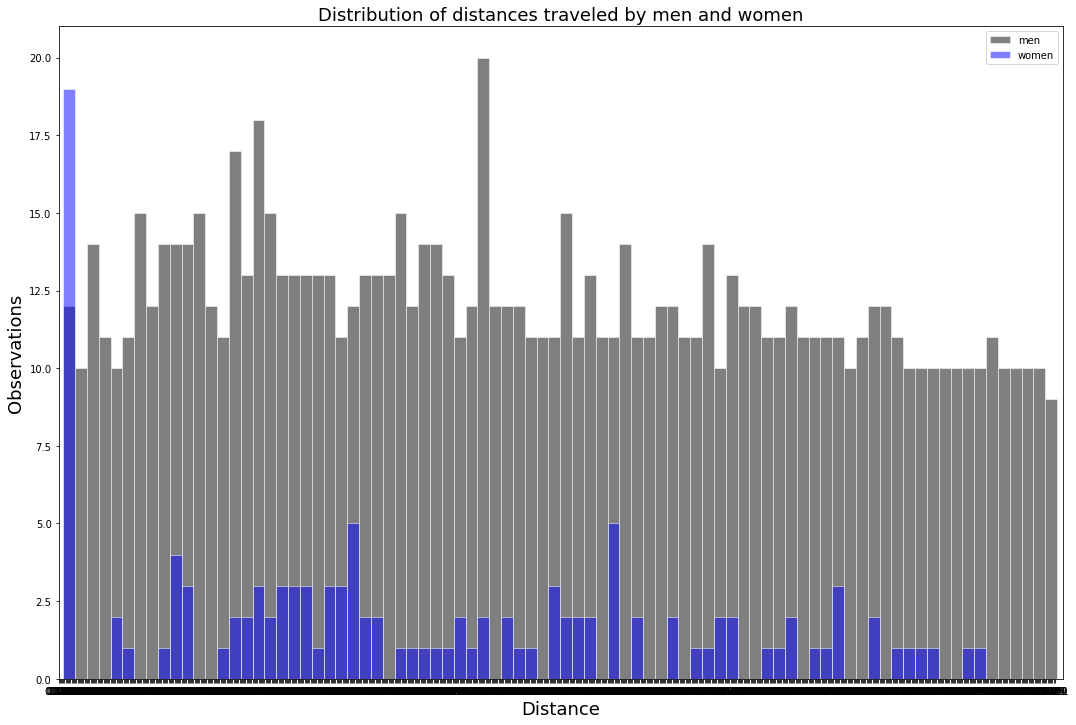

In [637]:
fig = figsize(18, 12)

bins = np.arange(5, 1000, 10)

pl.hist(df['distanceM'], bins, FaceColor='black', EdgeColor='white', alpha = 0.5, label='men')
pl.hist(df['distanceF'], bins, FaceColor='blue', EdgeColor='white', alpha = 0.5, label='women')
pl.xlabel('Distance', fontsize=18)
pl.ylabel('Observations', fontsize=18)
pl.title('Distribution of distances traveled by men and women', fontsize=18)
pl.xlim([1, 850])
pl.legend()
pl.show()

### Figure 6-1: The figure shows the histograms for distances traveled by men and women plotted at the same time. As you can see, for larger distances the observations for men are far higher than that for women. However, more women travel distances lower than a kilometer than men do.

## 7. Statistical Test

To test the Null Hypothesis, we will conduct a Student's t-test to compare the means of the groups.

In [643]:
df.head()

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,User Type,Gender,Distance,distanceM,distanceF
0,40.712868,-73.956981,40.708771,-73.950953,Subscriber,1,0.682,0.682,NaN
1056,40.750380,-73.983390,40.730386,-74.002150,Subscriber,1,2.728,2.728,NaN
2107,40.749156,-73.991600,40.742354,-73.989151,Subscriber,2,0.784,NaN,0.784
3147,40.760301,-73.998842,40.746920,-74.004519,Subscriber,1,1.563,1.563,NaN
4213,40.731724,-74.006744,40.737262,-73.992390,Subscriber,1,1.357,1.357,NaN


In [644]:
df1 = df['distanceM']

In [646]:
df2 = df['distanceF']

In [647]:
df1 = df1.dropna(axis=0, how='any')

In [649]:
df2 = df2.dropna(axis=0, how='any')

In [651]:
# Conducting the t-test

st.ttest_ind(df1, df2, axis=0, equal_var=True)

Ttest_indResult(statistic=-1.5645170379043327, pvalue=0.11792579805912497)

P-value is 0.118 > alpha = 0.05

## 8. Results

** Null Hypothesis: The average trip distance cycled by women in the month of October, 2016 is the same or less than that of men.**

Student's t-test resulted in a P-value of 0.118, which is more than the significance level alpha, initially set to be 0.05. Therefore, we can not reject the Null Hypothesis, and therefore the Null holds: within the month of October, 2016 women do cycle same or less than men.